In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6008371,431,PAYMENT,12816.18,C429795283,106381.0,93564.82,M1203959746,0.00,0.00,0,0
2085421,182,TRANSFER,252424.94,C159805608,0.0,0.00,C1678696340,1635999.82,1888424.76,0,0
3674969,276,CASH_IN,269281.21,C1621783099,144754.0,414035.21,C1075483884,1222808.21,953527.00,0,0
4442127,323,CASH_OUT,170300.44,C1144369898,0.0,0.00,C1061710719,213516.21,383816.65,0,0
3923902,285,CASH_IN,217785.74,C764734544,102282.0,320067.74,C366312389,0.00,0.00,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Detecting null value percentge

In [6]:
(df.isnull().sum() /len(df))*100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

There is no null value in the dataset

Detecting outliers using IQR

In [7]:
columns_to_check = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

In [8]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [9]:
filtered_data = df[~((df[columns_to_check] < (lower_bound)) | (df[columns_to_check] > (upper_bound))).any(axis=1)]

In [10]:
print(f"Original data shape: {df.shape}")
print(f"Filtered data shape: {filtered_data.shape}")


Original data shape: (6362620, 11)
Filtered data shape: (4393187, 11)


In [11]:
(len(filtered_data)/len(df))*100

69.0468234783784

So from above data it shows about 30% data are outliers and lossing 30% data is not good practice so we will continue with orignial dataset without changing any thigs

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [13]:
df['type'].replace(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
                        [0, 1, 2, 3,4], inplace=True)

In [14]:
features = ['amount','type',  'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

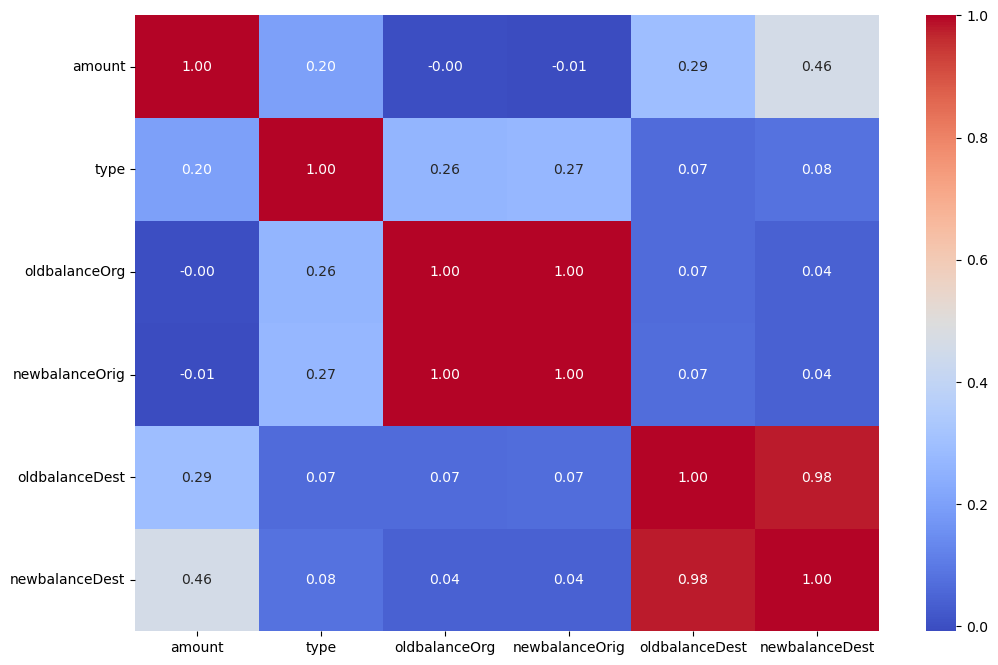

In [15]:
corr_matrix = df[features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [16]:
X = df[features].dropna()  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(len(X.columns))]

print(vif_data)

if vif_data['VIF'].max() > 10:
    high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
    X = X.drop(columns=high_vif_features)
    print(f"Dropped features: {high_vif_features}")


          Feature         VIF
0          amount    3.886263
1            type    1.211101
2   oldbalanceOrg  453.811582
3  newbalanceOrig  457.644765
4  oldbalanceDest   65.645296
5  newbalanceDest   75.724903
Dropped features: ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


In [20]:
df['amount_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)
df['balanceOrgChange'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDestChange'] = df['newbalanceDest'] - df['oldbalanceDest']

In [21]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_ratio,balanceOrgChange,balanceDestChange
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.057834,-9839.64,0.00
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.087731,-1864.28,0.00
2,1,3,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.994505,-181.00,0.00
3,1,0,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.994505,-181.00,-21182.00
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.280788,-11668.14,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,0,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0.999997,-339682.13,339682.13
6362616,743,3,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,1.000000,-6311409.28,0.00
6362617,743,0,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1.000000,-6311409.28,6311409.27
6362618,743,3,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.999999,-850002.52,0.00


In [25]:
df = df.drop(columns=[ 'nameOrig', 'nameDest'])

In [26]:
df

,step,type,amount,isFraud,isFlaggedFraud,amount_ratio,balanceOrgChange,balanceDestChange
0,1,1,9839.64,0,0,0.057834,-9839.64,0.00
1,1,1,1864.28,0,0,0.087731,-1864.28,0.00
2,1,3,181.00,1,0,0.994505,-181.00,0.00
3,1,0,181.00,1,0,0.994505,-181.00,-21182.00
4,1,1,11668.14,0,0,0.280788,-11668.14,0.00
...,...,...,...,...,...,...,...,...
6362615,743,0,339682.13,1,0,0.999997,-339682.13,339682.13
6362616,743,3,6311409.28,1,0,1.000000,-6311409.28,0.00
6362617,743,0,6311409.28,1,0,1.000000,-6311409.28,6311409.27
6362618,743,3,850002.52,1,0,0.999999,-850002.52,0.00


In [27]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [29]:
X=df[['step','type' ,'amount', 'amount_ratio','balanceOrgChange', 'balanceDestChange']]
y=df['isFraud']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:

rf = RandomForestClassifier(random_state=42)

In [33]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = rf.predict(X_test_scaled)

In [35]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("AUC-ROC Score:")
print(roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541782
           1       0.99      0.76      0.86      3266

    accuracy                           1.00   2545048
   macro avg       0.99      0.88      0.93   2545048
weighted avg       1.00      1.00      1.00   2545048

Confusion Matrix:
[[2541752      30]
 [    774    2492]]
AUC-ROC Score:
0.8815005285120923


In [36]:
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

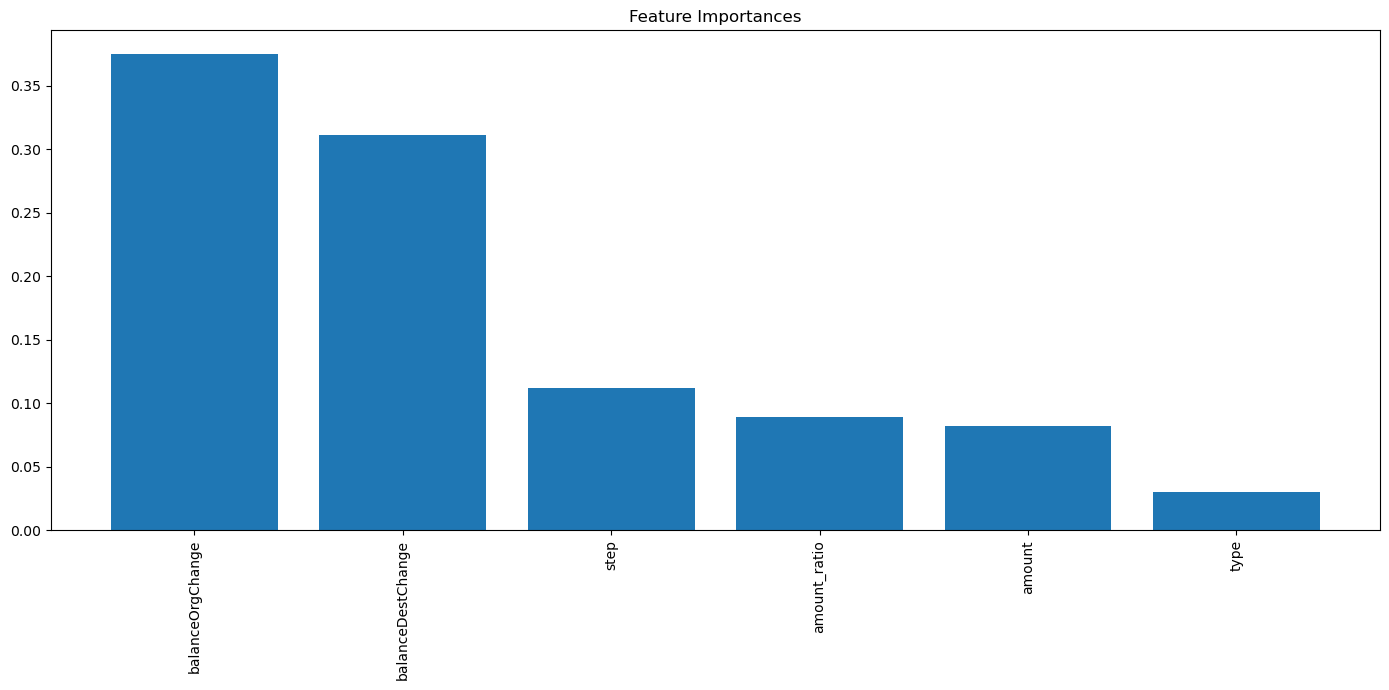

In [37]:
plt.figure(figsize=(14, 7))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

Features like amount, type, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, transaction_diff, and balance_ratio are all logically related to the nature of transactions and potential fraudulent activity. For example, large transaction amounts or unusual balance changes could indicate fraud.



Based on the model's insights, the company could adopt the following preventive measures:

Transaction Limits, 
Real-Time Monitoring,
Customer Alerts, 
Enhanced Verification


To determine the effectiveness of these actions

Monitor Fraud Rates, Customer Feedback, 
Model Performance, 
Incident Analysis

By implementing a Random Forest model, evaluating its performance, and visualizing feature importances, we gained valuable insights into fraud detection. The suggested preventive measures and continuous monitoring will help in effectively reducing fraudulent transactions.


